## PROYECTO 2 - SDS
## Sara Zavala 18893

### Analisis Exploratorio

In [125]:
#Importaciones
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from IPython.display import Image
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [51]:
low_memory=False

#### Primero trabajamos con el dataset train

In [52]:
train = pd.read_csv('train.csv')

In [28]:
train

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921478,ffffedfe8fcc46e6d36ab39953589fee,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1555.0,0,7.0,0,NaN,53447.0,...,63069.0,1,NaN,0.0,0,0,0.0,0.0,5.0,1
8921479,ffffef606490b2970873ec0a27ebd24b,win8defender,1.1.13303.0,4.9.10586.672,1.233.4218.0,0,7.0,0,1078.0,59914.0,...,NaN,0,0.0,0.0,0,0,0.0,0.0,5.0,0
8921480,fffff8a40070d2d8379bb7fa2ed2fa66,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1242.0,0,7.0,0,NaN,53447.0,...,71061.0,1,NaN,0.0,0,0,0.0,0.0,7.0,1
8921481,fffffbbaaf5969ae4b93e7f3f6d7132f,win8defender,1.1.14901.4,4.16.17656.18052,1.269.1834.0,0,7.0,0,NaN,6630.0,...,33142.0,1,NaN,0.0,0,0,0.0,0.0,13.0,1


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   DefaultBrowsersIdentifier                          float64
 9   AVProductStatesIdentifier                          float64
 10  AVProductsInstalled                                float64
 11  AVProductsEnabled                                 

In [31]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [32]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [33]:
train.head(10)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
5,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
6,0000161e8abf8d8b89c5ab8787fd712b,win8defender,1.1.15100.1,4.18.1807.18075,1.273.845.0,0,7.0,0,NaN,43927.0,...,63175.0,1,NaN,0.0,0,0,0.0,0.0,10.0,1
7,000019515bc8f95851aff6de873405e8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1393.0,0,7.0,0,NaN,53447.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
8,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,NaN,53447.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
9,00001a18d69bb60bda9779408dcf02ac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.973.0,0,7.0,0,NaN,46413.0,...,63555.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1


#### Cantidad de filas y columnas

In [34]:
train.shape

(8921483, 83)

In [35]:
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8.889165e+06,8.921483e+06,433438.000000,8.885262e+06,8.885262e+06,8.885262e+06,8.921483e+06,8.921483e+06,8.596074e+06,...,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8.850140e+06,8.618032e+06,8.618032e+06,8.921483e+06
mean,7.509962e-06,6.845332e+00,1.733378e-02,1658.355421,4.784001e+04,1.326779e+00,1.020967e+00,9.879711e-01,1.080490e+02,8.126653e+04,...,3.302792e+04,4.860229e-01,3.065811e-07,7.039446e-03,1.255431e-01,3.807091e-02,5.741920e-02,2.835785e-01,7.883565e+00,4.997927e-01
std,2.740421e-03,1.026055e+00,1.305118e-01,998.960373,1.403237e+04,5.229272e-01,1.675544e-01,1.090149e-01,6.304706e+01,4.892339e+04,...,2.120691e+04,4.998046e-01,5.536976e-04,8.360558e-02,3.313338e-01,1.913675e-01,2.326419e-01,4.507347e-01,4.550121e+00,5.000000e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,788.000000,4.948000e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.682500e+04,...,1.315600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,1632.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,8.237300e+04,...,3.307000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,0.000000e+00,7.000000e+00,0.000000e+00,2373.000000,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.237000e+05,...,5.243600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00
max,1.000000e+00,3.500000e+01,1.000000e+00,3213.000000,7.050700e+04,7.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,...,7.210500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+00


#### Ahora vamos a trabajar con el dataset test

In [38]:
low_memory=False

In [39]:
test = pd.read_csv('test.csv')

In [40]:
test

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,...,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,...,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,...,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,...,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,00000574cefffeca83ec8adf9285b2bf,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,NaN,53447.0,...,556.0,63269.0,1,NaN,0.0,0,0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853248,fffff8c0e065c468a2373f7afd5e7674,win8defender,1.1.15400.5,4.18.1810.5,1.281.261.0,0,7.0,0,NaN,53447.0,...,554.0,33060.0,0,NaN,0.0,0,0,0.0,0.0,10.0
7853249,fffff90b27a1248b6fffc7a535bd736c,win8defender,1.1.15400.5,4.18.1810.5,1.281.382.0,0,7.0,0,NaN,53447.0,...,142.0,42119.0,0,NaN,0.0,0,0,0.0,0.0,11.0
7853250,fffffa6a956c17ddbabca53d4ab708ae,win8defender,1.1.15400.5,4.18.1810.5,1.281.261.0,0,7.0,0,NaN,68585.0,...,152.0,8391.0,1,NaN,0.0,0,0,0.0,1.0,7.0
7853251,fffffad7b6c8196ec5cae634406c0d4f,win8defender,1.1.15400.4,4.8.10240.17443,1.279.1433.0,0,7.0,0,NaN,53447.0,...,897.0,67854.0,0,0.0,0.0,0,0,0.0,0.0,11.0


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853253 entries, 0 to 7853252
Data columns (total 82 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   DefaultBrowsersIdentifier                          float64
 9   AVProductStatesIdentifier                          float64
 10  AVProductsInstalled                                float64
 11  AVProductsEnabled                                 

In [43]:
test.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,...,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,...,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,...,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,...,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,00000574cefffeca83ec8adf9285b2bf,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,NaN,53447.0,...,556.0,63269.0,1,NaN,0.0,0,0,0.0,1.0,3.0


In [46]:
test.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [48]:
# Cantidad de filas y columnas
test.shape

(7853253, 82)

In [49]:
test.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
count,7.853253e+06,7.821031e+06,7.853253e+06,307119.000000,7.829486e+06,7.829486e+06,7.829486e+06,7.853253e+06,7.853253e+06,7.661291e+06,...,7.654619e+06,7.675629e+06,7.853253e+06,2.330546e+06,7.835962e+06,7.853253e+06,7.853253e+06,7.763101e+06,7.550396e+06,7.550396e+06
mean,5.857445e-06,6.852231e+00,1.586807e-02,1604.120797,4.944972e+04,1.273465e+00,1.018253e+00,9.917166e-01,1.094486e+02,8.121278e+04,...,3.966691e+02,3.267878e+04,4.513596e-01,4.290840e-07,8.248381e-03,1.182907e-01,3.794440e-02,5.448467e-02,2.977041e-01,7.701044e+00
std,2.420209e-03,1.009466e+00,1.249651e-01,1049.237340,1.226556e+04,4.916655e-01,1.551581e-01,9.063571e-02,6.318849e+01,4.903231e+04,...,2.218320e+02,2.114642e+04,4.976285e-01,6.550450e-04,9.044527e-02,3.229521e-01,1.910618e-01,2.269716e-01,4.572487e-01,4.529220e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,508.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.682900e+04,...,1.420000e+02,1.260600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,1632.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,8.237300e+04,...,4.860000e+02,3.306000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
75%,0.000000e+00,7.000000e+00,0.000000e+00,2377.000000,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.640000e+02,1.232060e+05,...,5.560000e+02,5.208100e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01
max,1.000000e+00,4.000000e+01,1.000000e+00,3214.000000,7.050200e+04,6.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,...,1.088000e+03,7.211100e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01


## Preprocesamiento y Seleccion de caracteristicas

In [55]:
## TRAIN
print("TRAIN --> FILAS Y COLUMNAS -->",train.shape)

TRAIN --> FILAS Y COLUMNAS --> (8921483, 83)


In [56]:
## TEST
print("TEST --> FILAS Y COLUMNAS -->",test.shape)

TEST --> FILAS Y COLUMNAS --> (7853253, 82)


Para poder trabajar de mejor manera, vamos a acortar la cantidad de datos para poder manejar mejor los mismos

In [60]:
#NUEVO DATASET TRAIN
cantidad_presente = int(train.shape[0]/150)

In [61]:
new_train = train.sample(n = cantidad_presente, random_state = 10)

In [62]:
new_train

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
2672129,4cab9100b7a9424e3b6fd0eed2f25022,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,0,7.0,0,239.0,62773.0,...,44626.0,1,NaN,0.0,1,0,0.0,NaN,NaN,0
8117295,e8ea845a232c2d0a1fe0d66bb876ff9b,win8defender,1.1.15100.1,4.12.16299.15,1.273.1826.0,0,7.0,0,NaN,53447.0,...,7145.0,0,NaN,0.0,0,0,0.0,NaN,NaN,0
8651167,f83d7c803966d458d4232c68d09e55be,win8defender,1.1.14901.4,4.10.209.0,1.269.1834.0,0,7.0,0,NaN,53447.0,...,63396.0,1,0.0,0.0,0,0,0.0,0.0,11.0,1
7349234,d2dbcdf7b3695dbce32de7dc1e2a13f3,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1209.0,0,7.0,0,NaN,53447.0,...,12450.0,0,0.0,0.0,0,0,0.0,1.0,11.0,1
5908513,a99408f4dc7b4a33405290e9f99e2920,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,0,7.0,0,NaN,23657.0,...,7663.0,0,NaN,0.0,0,0,0.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442442,9c37faf4ba5994f09401811c56092174,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1144.0,0,7.0,0,NaN,53447.0,...,4343.0,1,0.0,0.0,0,0,0.0,1.0,10.0,1
8844891,fdcfa1943e7203f2d5420da4fef73b43,win8defender,1.1.15200.1,4.18.1807.18075,1.275.609.0,0,7.0,0,NaN,53447.0,...,15895.0,1,NaN,0.0,0,0,0.0,1.0,3.0,0
6710744,c09762255cfe490f08052522aafc3eac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1405.0,0,7.0,0,NaN,7945.0,...,19889.0,1,0.0,0.0,0,0,0.0,1.0,1.0,0
3988695,7274a203b91178f941c87e00543f958f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1555.0,0,7.0,0,NaN,53447.0,...,63837.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [63]:
# NUEVO DATASET TEST
cantidad_presente_test = int(test.shape[0]/150)

In [64]:
new_test = test.sample(n = cantidad_presente_test, random_state = 10)

In [65]:
new_test

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
2539122,52bf4290f63d70c8239fce80e32384d8,win8defender,1.1.15400.4,4.18.1809.2,1.279.165.0,0,7.0,0,NaN,53447.0,...,556.0,62888.0,1,NaN,0.0,0,0,0.0,0.0,1.0
2538781,52bc6c7571b56736c366933360cf0a21,win8defender,1.1.15400.5,4.13.17134.1,1.281.297.0,0,7.0,0,NaN,53447.0,...,142.0,11097.0,1,NaN,0.0,0,0,0.0,1.0,10.0
2573311,53dfc770845d8d9a665951d03872e622,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,554.0,33054.0,1,NaN,0.0,0,0,0.0,0.0,10.0
3954499,80e126c341ab96fa0c86d628bf9e7157,win8defender,1.1.15400.5,4.18.1810.5,1.281.638.0,0,7.0,0,NaN,53447.0,...,554.0,33142.0,0,NaN,0.0,0,0,0.0,0.0,11.0
5354581,ae7b06596bdf9925e0ffbd5d7910bb43,win8defender,1.1.15300.6,4.18.1809.2,1.277.366.0,0,7.0,0,NaN,7945.0,...,628.0,21924.0,0,0.0,0.0,0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027460,62a716ba448e15b64747041c0d42438b,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,0,7.0,0,2290.0,68528.0,...,355.0,9323.0,0,NaN,0.0,0,0,1.0,0.0,7.0
3927385,80008a53fe216e696559fb642985137e,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,355.0,7213.0,1,NaN,0.0,0,0,0.0,0.0,1.0
3788964,7b7b870abcc69e8cf8d7a2e52541186c,win8defender,1.1.15300.6,4.18.1809.2,1.277.705.0,0,7.0,0,NaN,49480.0,...,142.0,19771.0,0,0.0,0.0,0,0,0.0,1.0,3.0
1738558,389ea2ac0c825a2f15fdfdb9da81e367,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1454.0,0,7.0,0,NaN,62773.0,...,644.0,31836.0,1,NaN,0.0,0,0,0.0,0.0,10.0


In [66]:
new_train.to_csv('new_train.csv')  

In [67]:
new_test.to_csv('new_test.csv')  

#### Terminamos de acortar la data y seguimos con le analisis y preprocesamiento de estos nuevos samples

In [69]:
## Leer nuevamente los sets
low_memory=False
train_sample = pd.read_csv('new_train.csv')

In [70]:
train_sample

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,2672129,4cab9100b7a9424e3b6fd0eed2f25022,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,0,7.0,0,239.0,...,44626.0,1,NaN,0.0,1,0,0.0,NaN,NaN,0
1,8117295,e8ea845a232c2d0a1fe0d66bb876ff9b,win8defender,1.1.15100.1,4.12.16299.15,1.273.1826.0,0,7.0,0,NaN,...,7145.0,0,NaN,0.0,0,0,0.0,NaN,NaN,0
2,8651167,f83d7c803966d458d4232c68d09e55be,win8defender,1.1.14901.4,4.10.209.0,1.269.1834.0,0,7.0,0,NaN,...,63396.0,1,0.0,0.0,0,0,0.0,0.0,11.0,1
3,7349234,d2dbcdf7b3695dbce32de7dc1e2a13f3,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1209.0,0,7.0,0,NaN,...,12450.0,0,0.0,0.0,0,0,0.0,1.0,11.0,1
4,5908513,a99408f4dc7b4a33405290e9f99e2920,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,0,7.0,0,NaN,...,7663.0,0,NaN,0.0,0,0,0.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,5442442,9c37faf4ba5994f09401811c56092174,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1144.0,0,7.0,0,NaN,...,4343.0,1,0.0,0.0,0,0,0.0,1.0,10.0,1
59472,8844891,fdcfa1943e7203f2d5420da4fef73b43,win8defender,1.1.15200.1,4.18.1807.18075,1.275.609.0,0,7.0,0,NaN,...,15895.0,1,NaN,0.0,0,0,0.0,1.0,3.0,0
59473,6710744,c09762255cfe490f08052522aafc3eac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1405.0,0,7.0,0,NaN,...,19889.0,1,0.0,0.0,0,0,0.0,1.0,1.0,0
59474,3988695,7274a203b91178f941c87e00543f958f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1555.0,0,7.0,0,NaN,...,63837.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [72]:
#TEST
low_memory=False

In [73]:
test_sample = pd.read_csv('new_test.csv')

In [79]:
test_sample.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,2539122,52bf4290f63d70c8239fce80e32384d8,win8defender,1.1.15400.4,4.18.1809.2,1.279.165.0,0,7.0,0,NaN,...,556.0,62888.0,1,NaN,0.0,0,0,0.0,0.0,1.0
1,2538781,52bc6c7571b56736c366933360cf0a21,win8defender,1.1.15400.5,4.13.17134.1,1.281.297.0,0,7.0,0,NaN,...,142.0,11097.0,1,NaN,0.0,0,0,0.0,1.0,10.0
2,2573311,53dfc770845d8d9a665951d03872e622,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,...,554.0,33054.0,1,NaN,0.0,0,0,0.0,0.0,10.0
3,3954499,80e126c341ab96fa0c86d628bf9e7157,win8defender,1.1.15400.5,4.18.1810.5,1.281.638.0,0,7.0,0,NaN,...,554.0,33142.0,0,NaN,0.0,0,0,0.0,0.0,11.0
4,5354581,ae7b06596bdf9925e0ffbd5d7910bb43,win8defender,1.1.15300.6,4.18.1809.2,1.277.366.0,0,7.0,0,NaN,...,628.0,21924.0,0,0.0,0.0,0,0,0.0,1.0,1.0


In [81]:
train_sample.columns

Index(['Unnamed: 0', 'MachineIdentifier', 'ProductName', 'EngineVersion',
       'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeN

#### Ahora vamos a quitar todos los datos que solamente hagan ruido

In [78]:
## TRAIN 
train_sample.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,2672129,4cab9100b7a9424e3b6fd0eed2f25022,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,0,7.0,0,239.0,...,44626.0,1,NaN,0.0,1,0,0.0,NaN,NaN,0
1,8117295,e8ea845a232c2d0a1fe0d66bb876ff9b,win8defender,1.1.15100.1,4.12.16299.15,1.273.1826.0,0,7.0,0,NaN,...,7145.0,0,NaN,0.0,0,0,0.0,NaN,NaN,0
2,8651167,f83d7c803966d458d4232c68d09e55be,win8defender,1.1.14901.4,4.10.209.0,1.269.1834.0,0,7.0,0,NaN,...,63396.0,1,0.0,0.0,0,0,0.0,0.0,11.0,1
3,7349234,d2dbcdf7b3695dbce32de7dc1e2a13f3,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1209.0,0,7.0,0,NaN,...,12450.0,0,0.0,0.0,0,0,0.0,1.0,11.0,1
4,5908513,a99408f4dc7b4a33405290e9f99e2920,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,0,7.0,0,NaN,...,7663.0,0,NaN,0.0,0,0,0.0,1.0,3.0,1


In [82]:
train_sample.columns

Index(['Unnamed: 0', 'MachineIdentifier', 'ProductName', 'EngineVersion',
       'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeN

### Luego se realizó un analisis de acuerdo a las estadisticas de Kaggle, para saber que columnas era necesario eliminar dependiendo a la cantidad de nulls y valores unicos que existian en cada sample

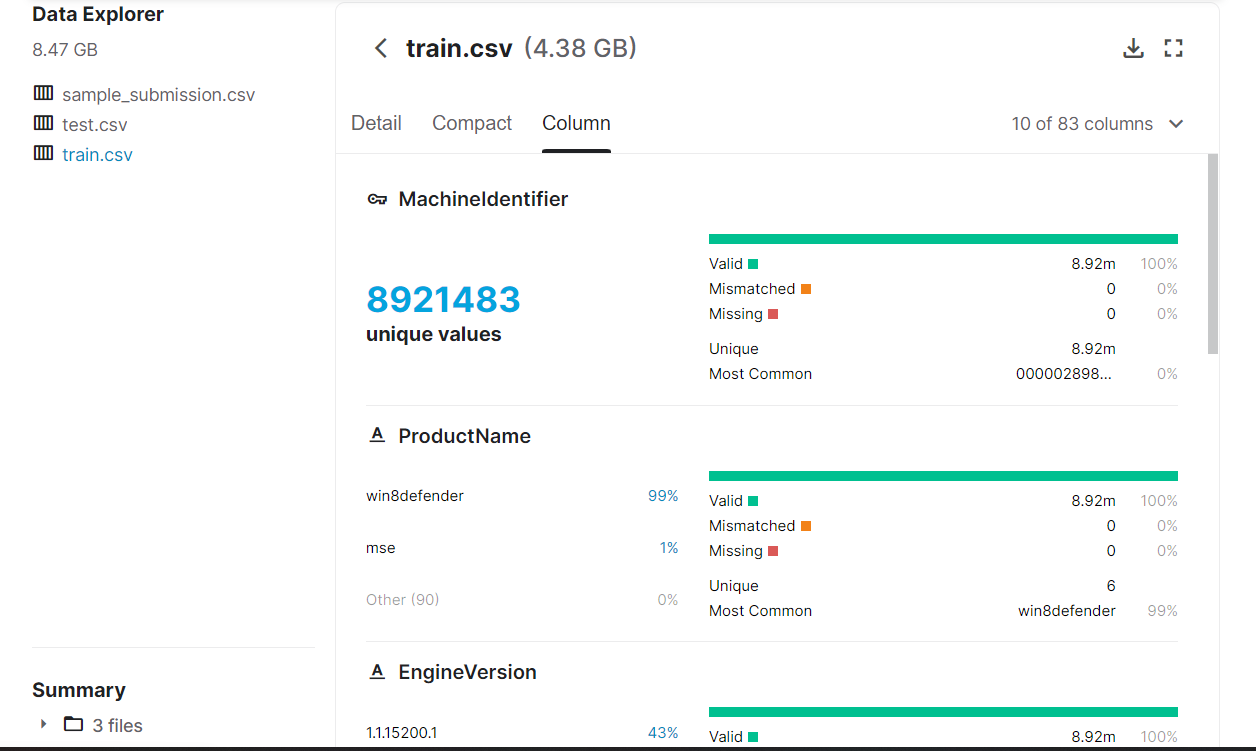

In [86]:
Image("train.png")

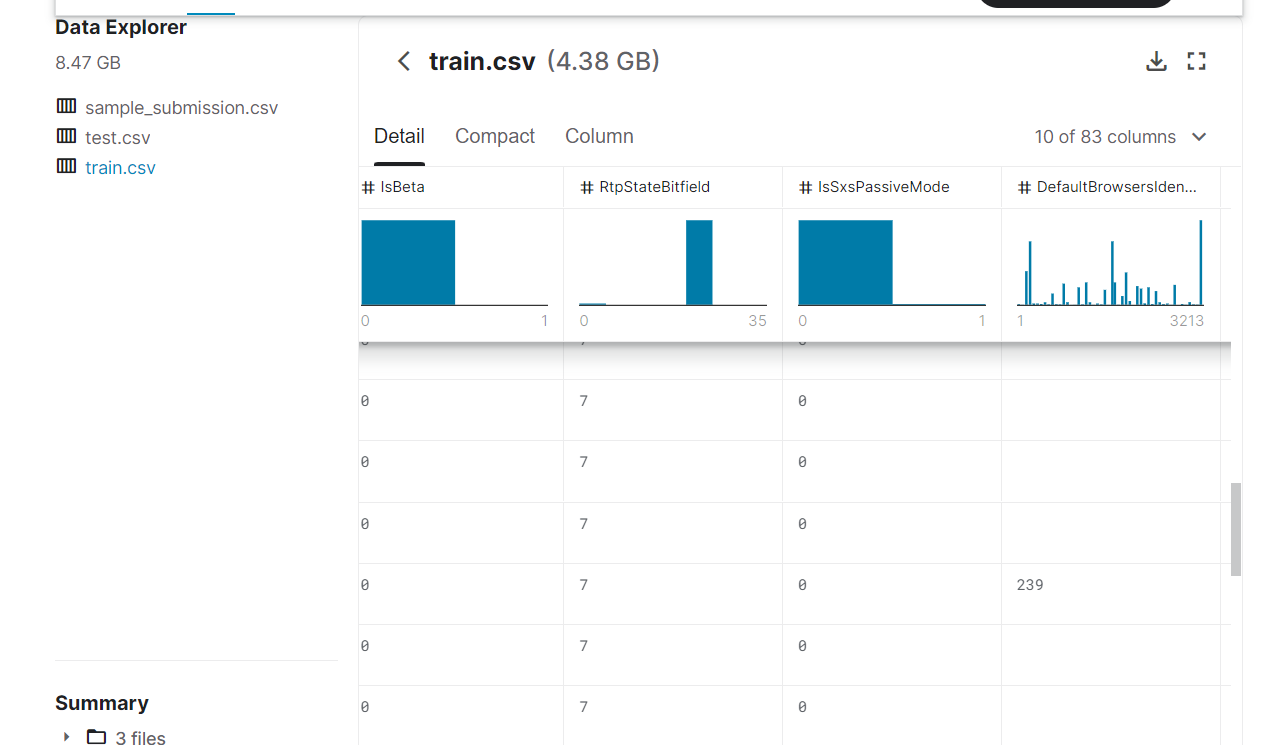

In [87]:
Image("train2.png")

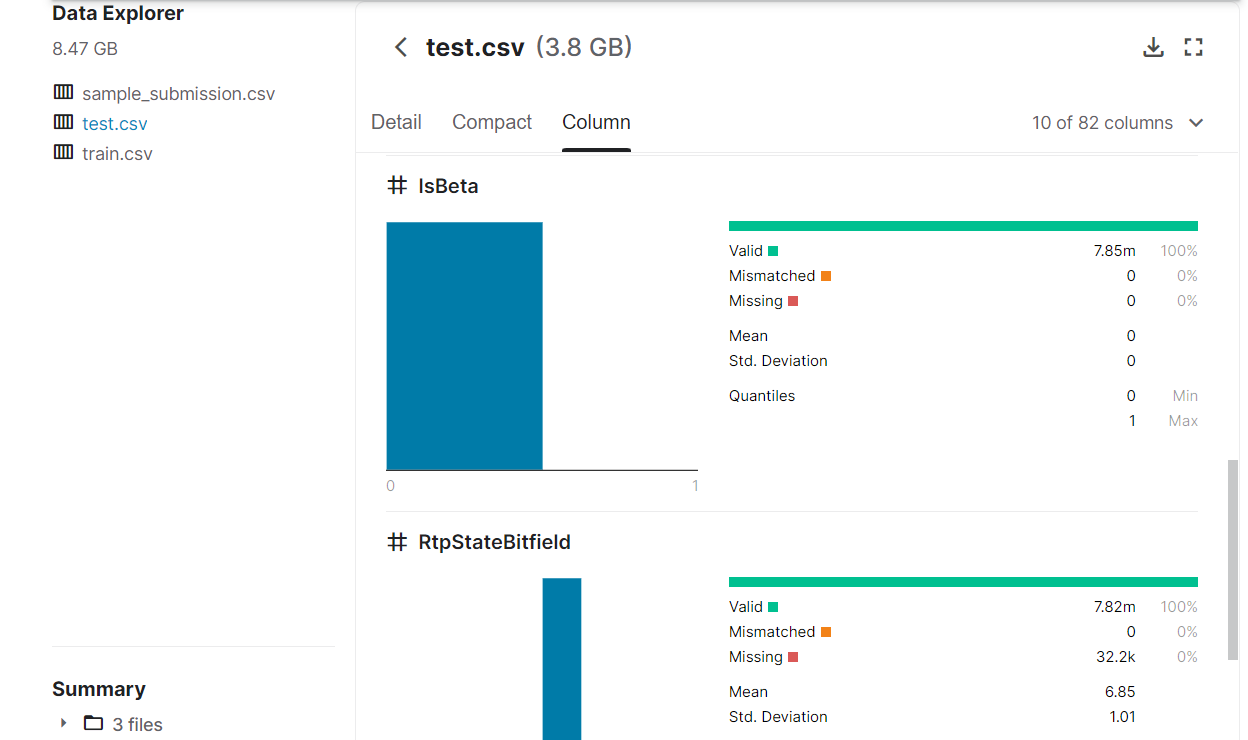

In [88]:
Image("null.png")

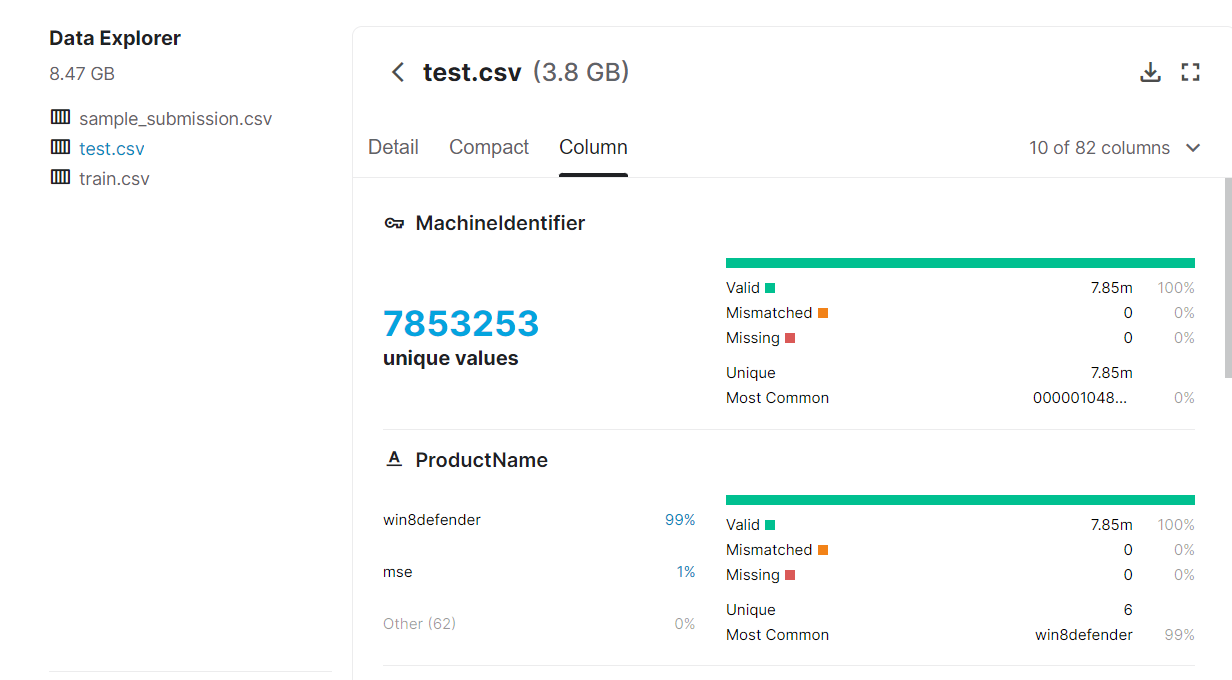

In [89]:
Image("unique.png")

#### De igual manera se llevó a cabo en codigo la separacion para la verifiacacion de las columnas

In [90]:
# TRAIN SAMPLE
train_sample['MachineIdentifier'].unique()

array(['4cab9100b7a9424e3b6fd0eed2f25022',
       'e8ea845a232c2d0a1fe0d66bb876ff9b',
       'f83d7c803966d458d4232c68d09e55be', ...,
       'c09762255cfe490f08052522aafc3eac',
       '7274a203b91178f941c87e00543f958f',
       'f74f9cd3d65308517d392cc8e02aa16e'], dtype=object)

In [91]:
#TEST SAMPLE
test_sample['MachineIdentifier'].unique()

array(['52bf4290f63d70c8239fce80e32384d8',
       '52bc6c7571b56736c366933360cf0a21',
       '53dfc770845d8d9a665951d03872e622', ...,
       '7b7b870abcc69e8cf8d7a2e52541186c',
       '389ea2ac0c825a2f15fdfdb9da81e367',
       '9e71208eaed05fc4a0ff167d8764d2a5'], dtype=object)

In [92]:
#TRAIN SAMPLE
train_sample['MachineIdentifier'].value_counts()

179971db0cbb5e1e1b370cdb7c0f76b2    1
86aad36f8f2421abd7b07307b09e7c3d    1
9f27f8abd4666b262a13495c82f700e6    1
224c06398f1c78967e9cd4d3892860b6    1
a6e13545d2fdcf0588fff38a668e2dcc    1
                                   ..
6bac88bc50e50af6d21b9632ca860fb8    1
404e36b59c6c0301fb06a20b859539cb    1
46c8211e6d9d3563adf9b6c9e0d11530    1
7ba2281bc1414f0c23d70e580f5d295a    1
140913ef0dc792618470790764b46958    1
Name: MachineIdentifier, Length: 59476, dtype: int64

In [99]:
#TRAIN
#Aqui podemos ver la cantidad de nulls en cada columna, y de acorde a eso vamos a droppearlas
pd.set_option('display.max_rows', 150)
train_sample.isna().sum()

Unnamed: 0                                               0
MachineIdentifier                                        0
ProductName                                              0
EngineVersion                                            0
AppVersion                                               0
AvSigVersion                                             0
IsBeta                                                   0
RtpStateBitfield                                       228
IsSxsPassiveMode                                         0
DefaultBrowsersIdentifier                            56690
AVProductStatesIdentifier                              238
AVProductsInstalled                                    238
AVProductsEnabled                                      238
HasTpm                                                   0
CountryIdentifier                                        0
CityIdentifier                                        2118
OrganizationIdentifier                               182

In [100]:
#TEST
#Aqui podemos ver la cantidad de nulls en cada columna, y de acorde a eso vamos a droppearlas
pd.set_option('display.max_rows', 150)
test_sample.isna().sum()

Unnamed: 0                                               0
MachineIdentifier                                        0
ProductName                                              0
EngineVersion                                            0
AppVersion                                               0
AvSigVersion                                             0
IsBeta                                                   0
RtpStateBitfield                                       196
IsSxsPassiveMode                                         0
DefaultBrowsersIdentifier                            50272
AVProductStatesIdentifier                              171
AVProductsInstalled                                    171
AVProductsEnabled                                      171
HasTpm                                                   0
CountryIdentifier                                        0
CityIdentifier                                        1273
OrganizationIdentifier                               164

In [ ]:
#VALORES UNICOS
# uniqueValues = train_sample[0].unique()
# uniqueValues = uniqueValues.tolist()
# uniqueValues

In [110]:
# Vamos a seguir con el sample TRAIN
train_sample = train_sample.drop(columns=['Unnamed: 0', 'MachineIdentifier', 'DefaultBrowsersIdentifier', 'ProductName','IsBeta','RtpStateBitfield',
                           'IsSxsPassiveMode','AVProductsEnabled','HasTpm','Platform','OrganizationIdentifier','OsVer', 'IsProtected',
                           'AutoSampleOptIn','SMode', 'Firewall','PuaMode','UacLuaenable','SmartScreen',    'Census_ProcessorClass','Census_InternalBatteryType',
                           'Census_IsFlightingInternal','Census_ThresholdOptIn','Census_IsWIMBootEnabled','Census_DeviceFamily', 'Census_HasOpticalDiskDrive',
                           'Census_IsFlightsDisabled','Census_IsVirtualDevice','Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable',
                           'Census_FlightRing', 'Census_IsPortableOperatingSystem'],axis=1)


##### Aqui ya se eliminarion todas las columnas que:
### - Tenian valores unicos
### - No se encontraban balanceadas
### - Tenian valores null

In [111]:
train_sample

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Processor,...,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1.1.14104.0,4.12.16299.15,1.251.42.0,62773.0,1.0,49,101182.0,277.0,75,x64,...,UNKNOWN,IS_GENUINE,OEM:DM,628.0,44626.0,1,1,NaN,NaN,0
1,1.1.15100.1,4.12.16299.15,1.273.1826.0,53447.0,1.0,66,109095.0,89.0,88,x64,...,FullAuto,IS_GENUINE,Retail,142.0,7145.0,0,0,NaN,NaN,0
2,1.1.14901.4,4.10.209.0,1.269.1834.0,53447.0,1.0,201,66202.0,267.0,251,x64,...,FullAuto,IS_GENUINE,Retail,556.0,63396.0,1,0,0.0,11.0,1
3,1.1.15200.1,4.18.1807.18075,1.275.1209.0,53447.0,1.0,108,75425.0,277.0,75,x86,...,FullAuto,IS_GENUINE,Retail,142.0,12450.0,0,0,1.0,11.0,1
4,1.1.15100.1,4.18.1807.18075,1.273.1420.0,23657.0,2.0,50,115291.0,68.0,51,x64,...,FullAuto,IS_GENUINE,OEM:NONSLP,142.0,7663.0,0,0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,1.1.15100.1,4.18.1807.18075,1.273.1144.0,53447.0,1.0,141,92213.0,167.0,233,x64,...,Notify,IS_GENUINE,OEM:DM,355.0,4343.0,1,0,1.0,10.0,1
59472,1.1.15200.1,4.18.1807.18075,1.275.609.0,53447.0,1.0,50,107869.0,68.0,51,x64,...,AutoInstallAndRebootAtMaintenanceTime,IS_GENUINE,OEM:DM,628.0,15895.0,1,0,1.0,3.0,0
59473,1.1.15100.1,4.18.1807.18075,1.273.1405.0,7945.0,2.0,115,31735.0,224.0,75,x64,...,FullAuto,IS_GENUINE,Retail,355.0,19889.0,1,0,1.0,1.0,0
59474,1.1.15100.1,4.18.1807.18075,1.273.1555.0,53447.0,1.0,115,31735.0,277.0,75,x64,...,FullAuto,INVALID_LICENSE,Retail,142.0,63837.0,0,0,0.0,1.0,1


In [112]:
#Lo guardamos para ya tener nuetras columnas depuradas y listas para
#Las implementaciones
train_sample.to_csv('new_train_2.csv')  

In [115]:
final_sample = pd.read_csv('new_train_2.csv')

In [116]:
final_sample

,Unnamed: 0,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,1.1.14104.0,4.12.16299.15,1.251.42.0,62773.0,1.0,49,101182.0,277.0,75,...,UNKNOWN,IS_GENUINE,OEM:DM,628.0,44626.0,1,1,NaN,NaN,0
1,1,1.1.15100.1,4.12.16299.15,1.273.1826.0,53447.0,1.0,66,109095.0,89.0,88,...,FullAuto,IS_GENUINE,Retail,142.0,7145.0,0,0,NaN,NaN,0
2,2,1.1.14901.4,4.10.209.0,1.269.1834.0,53447.0,1.0,201,66202.0,267.0,251,...,FullAuto,IS_GENUINE,Retail,556.0,63396.0,1,0,0.0,11.0,1
3,3,1.1.15200.1,4.18.1807.18075,1.275.1209.0,53447.0,1.0,108,75425.0,277.0,75,...,FullAuto,IS_GENUINE,Retail,142.0,12450.0,0,0,1.0,11.0,1
4,4,1.1.15100.1,4.18.1807.18075,1.273.1420.0,23657.0,2.0,50,115291.0,68.0,51,...,FullAuto,IS_GENUINE,OEM:NONSLP,142.0,7663.0,0,0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,59471,1.1.15100.1,4.18.1807.18075,1.273.1144.0,53447.0,1.0,141,92213.0,167.0,233,...,Notify,IS_GENUINE,OEM:DM,355.0,4343.0,1,0,1.0,10.0,1
59472,59472,1.1.15200.1,4.18.1807.18075,1.275.609.0,53447.0,1.0,50,107869.0,68.0,51,...,AutoInstallAndRebootAtMaintenanceTime,IS_GENUINE,OEM:DM,628.0,15895.0,1,0,1.0,3.0,0
59473,59473,1.1.15100.1,4.18.1807.18075,1.273.1405.0,7945.0,2.0,115,31735.0,224.0,75,...,FullAuto,IS_GENUINE,Retail,355.0,19889.0,1,0,1.0,1.0,0
59474,59474,1.1.15100.1,4.18.1807.18075,1.273.1555.0,53447.0,1.0,115,31735.0,277.0,75,...,FullAuto,INVALID_LICENSE,Retail,142.0,63837.0,0,0,0.0,1.0,1


In [117]:
final_sample = final_sample.drop(columns=['Unnamed: 0'],axis=1)

In [118]:
final_sample

,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Processor,...,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1.1.14104.0,4.12.16299.15,1.251.42.0,62773.0,1.0,49,101182.0,277.0,75,x64,...,UNKNOWN,IS_GENUINE,OEM:DM,628.0,44626.0,1,1,NaN,NaN,0
1,1.1.15100.1,4.12.16299.15,1.273.1826.0,53447.0,1.0,66,109095.0,89.0,88,x64,...,FullAuto,IS_GENUINE,Retail,142.0,7145.0,0,0,NaN,NaN,0
2,1.1.14901.4,4.10.209.0,1.269.1834.0,53447.0,1.0,201,66202.0,267.0,251,x64,...,FullAuto,IS_GENUINE,Retail,556.0,63396.0,1,0,0.0,11.0,1
3,1.1.15200.1,4.18.1807.18075,1.275.1209.0,53447.0,1.0,108,75425.0,277.0,75,x86,...,FullAuto,IS_GENUINE,Retail,142.0,12450.0,0,0,1.0,11.0,1
4,1.1.15100.1,4.18.1807.18075,1.273.1420.0,23657.0,2.0,50,115291.0,68.0,51,x64,...,FullAuto,IS_GENUINE,OEM:NONSLP,142.0,7663.0,0,0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,1.1.15100.1,4.18.1807.18075,1.273.1144.0,53447.0,1.0,141,92213.0,167.0,233,x64,...,Notify,IS_GENUINE,OEM:DM,355.0,4343.0,1,0,1.0,10.0,1
59472,1.1.15200.1,4.18.1807.18075,1.275.609.0,53447.0,1.0,50,107869.0,68.0,51,x64,...,AutoInstallAndRebootAtMaintenanceTime,IS_GENUINE,OEM:DM,628.0,15895.0,1,0,1.0,3.0,0
59473,1.1.15100.1,4.18.1807.18075,1.273.1405.0,7945.0,2.0,115,31735.0,224.0,75,x64,...,FullAuto,IS_GENUINE,Retail,355.0,19889.0,1,0,1.0,1.0,0
59474,1.1.15100.1,4.18.1807.18075,1.273.1555.0,53447.0,1.0,115,31735.0,277.0,75,x64,...,FullAuto,INVALID_LICENSE,Retail,142.0,63837.0,0,0,0.0,1.0,1


## Implementacion

In [128]:
corrmat

,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IeVerIdentifier,Census_OEMNameIdentifier,...,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
AVProductStatesIdentifier,1.000000,-0.628335,0.006249,-0.002835,0.022943,-0.080654,0.000657,-0.056852,-0.072910,0.020756,...,0.030385,0.018977,0.017603,-0.014805,-0.018911,-0.032774,0.038101,-0.019060,-0.021322,0.118227
AVProductsInstalled,-0.628335,1.000000,-0.025035,0.006874,-0.054825,0.041392,0.004509,0.185783,-0.032600,-0.068781,...,-0.019599,0.007909,0.006047,0.056255,0.042834,0.216554,-0.010135,0.015850,0.036524,-0.154862
CountryIdentifier,0.006249,-0.025035,1.000000,0.004345,0.597463,0.052829,0.005070,-0.000922,0.012005,-0.045575,...,-0.007670,0.101519,0.095896,-0.020623,0.020425,-0.013972,0.004858,0.021436,-0.115397,0.008971
CityIdentifier,-0.002835,0.006874,0.004345,1.000000,-0.055455,0.030420,0.006112,0.011685,0.011801,-0.006688,...,-0.015455,0.086698,0.087162,-0.026893,0.016847,0.011798,-0.011077,-0.001226,-0.056297,0.004496
GeoNameIdentifier,0.022943,-0.054825,0.597463,-0.055455,1.000000,-0.040248,-0.018506,-0.061940,-0.008566,-0.042991,...,0.031773,-0.121908,-0.123660,-0.005019,0.007712,-0.064224,0.019046,0.003296,-0.021697,0.008813
LocaleEnglishNameIdentifier,-0.080654,0.041392,0.052829,0.030420,-0.040248,1.000000,-0.010108,0.067804,0.011626,0.026781,...,-0.008005,0.123996,0.123449,0.013840,0.014093,0.025136,-0.042401,-0.005690,0.168611,0.014673
OsBuild,0.000657,0.004509,0.005070,0.006112,-0.018506,-0.010108,1.000000,-0.027429,-0.107151,0.011499,...,-0.492271,0.010514,0.012341,-0.061928,-0.021958,0.001076,-0.025428,0.142640,-0.021510,0.028458
OsSuite,-0.056852,0.185783,-0.000922,0.011685,-0.061940,0.067804,-0.027429,1.000000,-0.008141,-0.124686,...,-0.072032,0.007956,0.006934,0.080339,0.135137,0.460797,0.087908,-0.013166,0.040089,-0.024918
IeVerIdentifier,-0.072910,-0.032600,0.012005,0.011801,-0.008566,0.011626,-0.107151,-0.008141,1.000000,0.030396,...,-0.341516,0.040752,0.041532,-0.014398,-0.015280,-0.004956,-0.024068,-0.040524,0.005612,0.018761
Census_OEMNameIdentifier,0.020756,-0.068781,-0.045575,-0.006688,-0.042991,0.026781,0.011499,-0.124686,0.030396,1.000000,...,-0.019827,0.032086,0.033168,0.169784,-0.358898,-0.196003,0.017612,0.012464,0.038882,-0.007204


In [122]:
#Implementación AQUIIIIIIIIIIII 
sorted(Counter(final_sample).items())

[('AVProductStatesIdentifier', 1),
 ('AVProductsInstalled', 1),
 ('AppVersion', 1),
 ('AvSigVersion', 1),
 ('Census_ActivationChannel', 1),
 ('Census_ChassisTypeName', 1),
 ('Census_FirmwareManufacturerIdentifier', 1),
 ('Census_FirmwareVersionIdentifier', 1),
 ('Census_GenuineStateName', 1),
 ('Census_InternalBatteryNumberOfCharges', 1),
 ('Census_InternalPrimaryDiagonalDisplaySizeInInches', 1),
 ('Census_InternalPrimaryDisplayResolutionHorizontal', 1),
 ('Census_InternalPrimaryDisplayResolutionVertical', 1),
 ('Census_IsSecureBootEnabled', 1),
 ('Census_IsTouchEnabled', 1),
 ('Census_MDC2FormFactor', 1),
 ('Census_OEMModelIdentifier', 1),
 ('Census_OEMNameIdentifier', 1),
 ('Census_OSArchitecture', 1),
 ('Census_OSBranch', 1),
 ('Census_OSBuildNumber', 1),
 ('Census_OSBuildRevision', 1),
 ('Census_OSEdition', 1),
 ('Census_OSInstallLanguageIdentifier', 1),
 ('Census_OSInstallTypeName', 1),
 ('Census_OSSkuName', 1),
 ('Census_OSUILocaleIdentifier', 1),
 ('Census_OSVersion', 1),
 ('Cen

<AxesSubplot:>

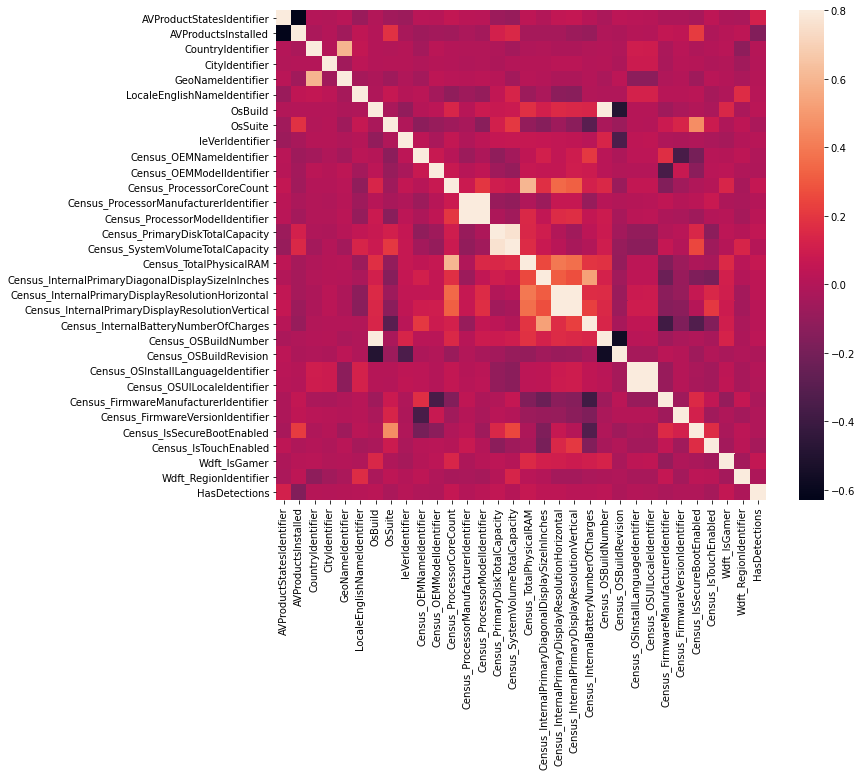

In [126]:
# Matriz de correlación:
corrmat = final_sample.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [129]:
final_sample.columns

Index(['EngineVersion', 'AppVersion', 'AvSigVersion',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier',
       'CityIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier',
       'Processor', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IeVerIdentifier', 'Census_MDC2FormFactor',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryNumberOfCharges',
       'Census_OSVersion', 'Census

In [139]:
#DATOS GRAFICADOS POR VERSION

1.1.15200.1    25780
1.1.15100.1    24424
1.1.15000.2     1744
1.1.14901.4     1360
1.1.14600.4     1033
1.1.14800.3      933
1.1.15300.6      821
1.1.14104.0      623
1.1.13504.0      467
1.1.15300.5      450
1.1.14500.5      350
1.1.14700.5      333
1.1.14405.2      225
1.1.14306.0      166
1.1.14003.0       82
1.1.14202.0       78
1.1.13407.0       67
1.1.13903.0       57
1.1.13804.0       54
1.1.13303.0       51
1.1.12902.0       46
1.1.14305.0       44
1.1.13704.0       39
1.1.13701.0       39
1.1.13103.0       38
1.1.13601.0       32
1.1.13202.0       30
1.1.13000.0       25
1.1.12805.0       21
1.1.15000.1       15
1.1.14700.4       10
1.1.14800.1       10
1.1.14700.3       10
1.1.14901.3        9
1.1.14500.2        3
1.1.14201.0        2
1.1.12603.0        1
1.1.12101.0        1
1.1.11701.0        1
1.1.11903.0        1
1.1.9700.0         1
Name: EngineVersion, dtype: int64

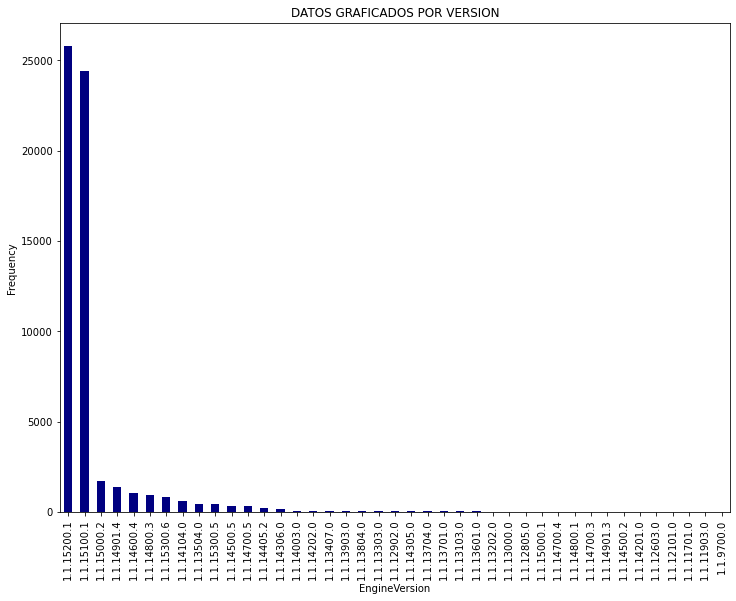

In [144]:
pd.value_counts(final_sample['EngineVersion']).plot.bar(figsize=(12, 9), color='navy')
plt.title('DATOS GRAFICADOS POR VERSION')
plt.xlabel('EngineVersion')
plt.ylabel('Frequency')
final_sample['EngineVersion'].value_counts()

In [138]:
#DATOS GRAFICADOS POR PROCESADOR

x64      54197
x86       5278
arm64        1
Name: Processor, dtype: int64

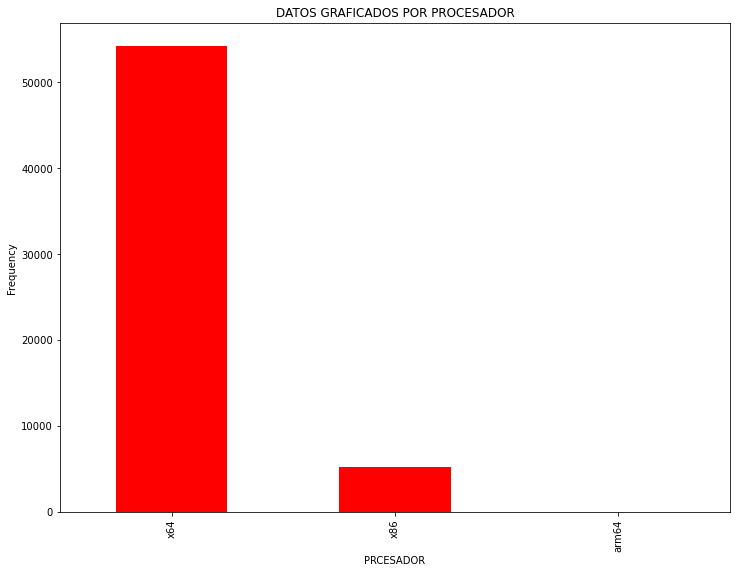

In [145]:
pd.value_counts(final_sample['Processor']).plot.bar(figsize=(12, 9), color='RED')
plt.title('DATOS GRAFICADOS POR PROCESADOR')
plt.xlabel('PRCESADOR')
plt.ylabel('Frequency')
final_sample['Processor'].value_counts()

In [149]:
#DISPLOT SEGUN EL IDENTIFICADOR DE CIUDAD

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


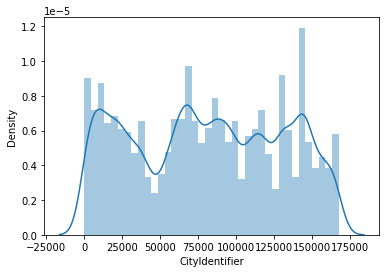

In [148]:
import seaborn as sns
sns.distplot(final_sample['CityIdentifier']);

In [158]:
#LO SIGUIENTE ESTA GRAFICADO SEGUN UBIACACIONES 

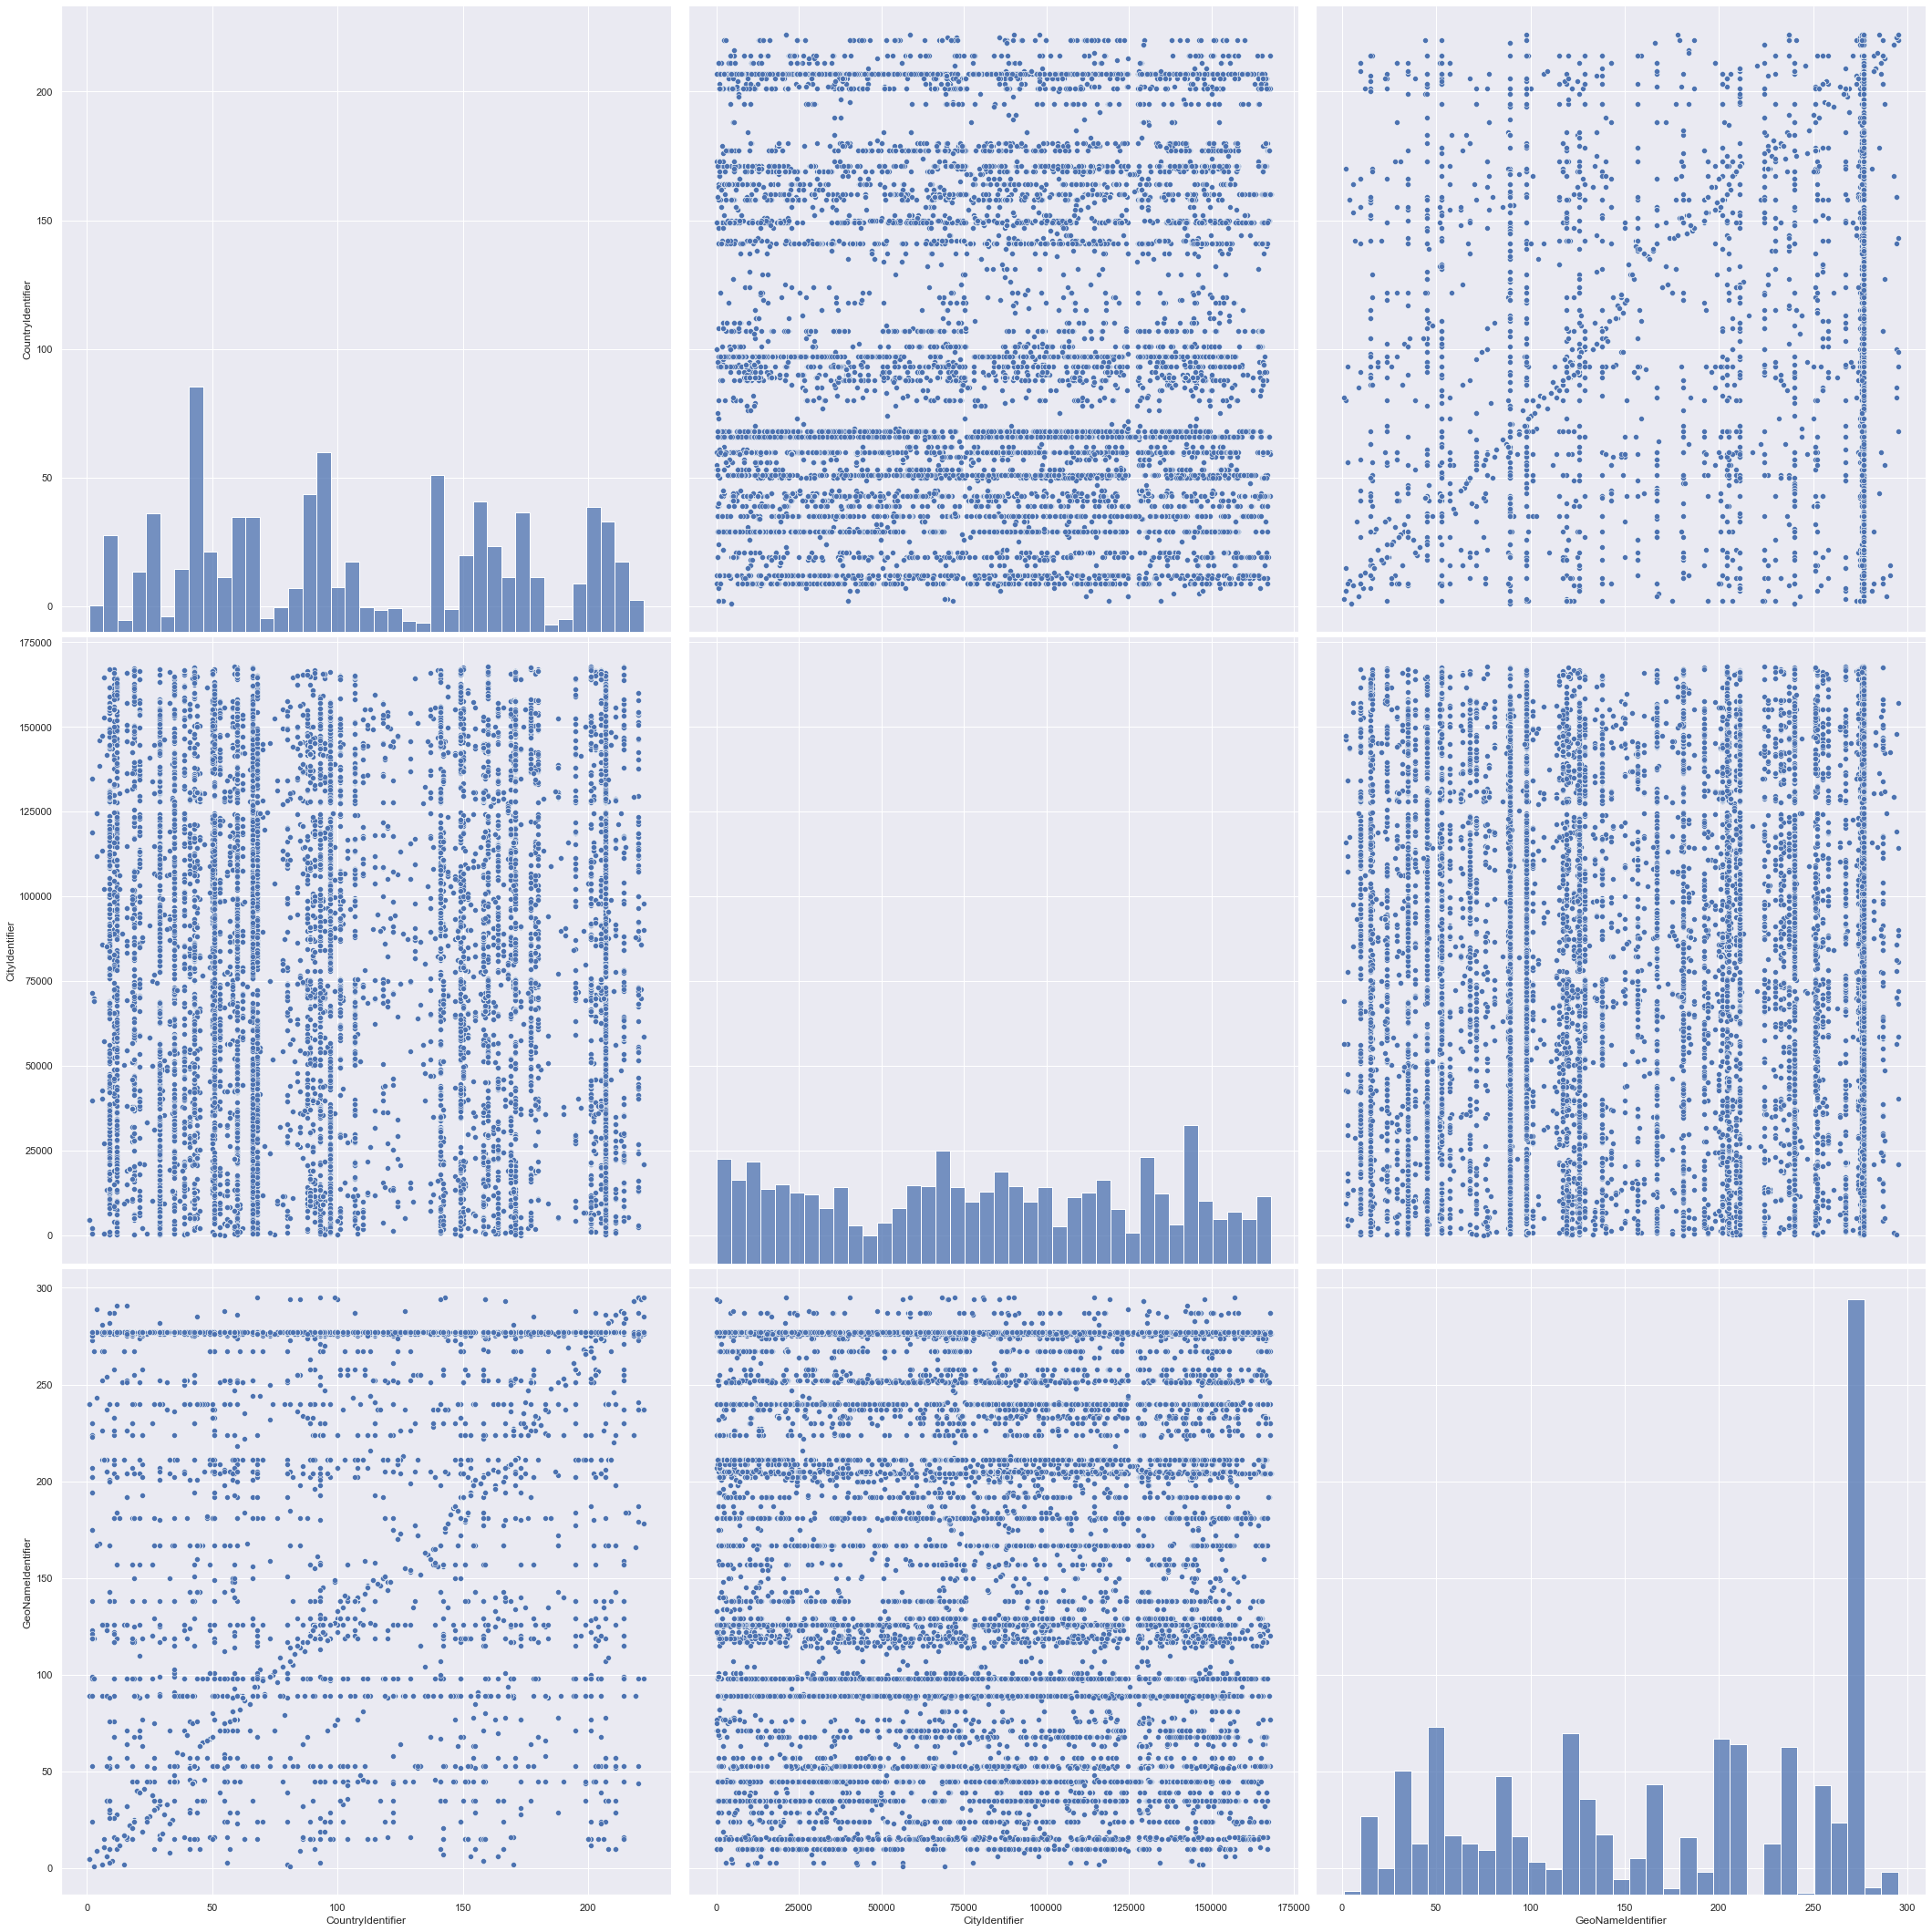

In [157]:
# Scatter plot:
sns.set()
cols = ['CountryIdentifier','CityIdentifier', 'GeoNameIdentifier']
sns.pairplot(final_sample[cols], height = 10)
plt.show();

In [163]:
# Asimetría y curtosis por pais:
print("Skewness: %f" % final_sample['Census_ProcessorCoreCount'].skew())
print("Kurtosis: %f" % final_sample['Census_ProcessorCoreCount'].kurt())

Skewness: 3.327359
Kurtosis: 34.894040


In [164]:
# Asimetría y curtosis por ciudad:
print("Skewness: %f" % final_sample['Census_SystemVolumeTotalCapacity'].skew())
print("Kurtosis: %f" % final_sample['Census_SystemVolumeTotalCapacity'].kurt())

Skewness: 1.859695
Kurtosis: 14.521315


In [171]:
corrmat[['AVProductsInstalled']].sort_values(by = 'AVProductsInstalled',ascending = False).style.background_gradient()

,AVProductsInstalled
AVProductsInstalled,1.000000
Census_IsSecureBootEnabled,0.216554
OsSuite,0.185783
Census_SystemVolumeTotalCapacity,0.148457
Census_PrimaryDiskTotalCapacity,0.116480
Census_FirmwareManufacturerIdentifier,0.056255
Census_FirmwareVersionIdentifier,0.042834
LocaleEnglishNameIdentifier,0.041392
Wdft_RegionIdentifier,0.036524
Wdft_IsGamer,0.015850


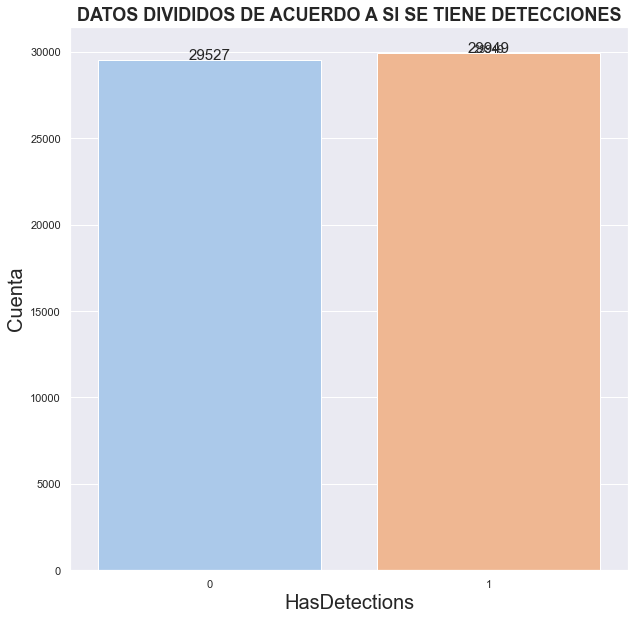

In [207]:
# define the figure and plot; modify the countplot figure size
countplt, ax = plt.subplots(figsize = (10,10))
ax =sns.countplot(x = 'HasDetections', data=final_sample,palette='pastel')
ax.set_title('DATOS DIVIDIDOS DE ACUERDO A SI SE TIENE DETECCIONES',fontsize = 18, fontweight='bold' )
ax.set_xlabel('HasDetections', fontsize = 20)
ax.set_ylabel('Cuenta', fontsize = 20)
ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15 )

